In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
# import pickle
from scipy.optimize import fsolve

In [2]:
import agnSED       

In [3]:
help(agnSED)

Help on package agnSED:

NAME
    agnSED

PACKAGE CONTENTS
    Lgaldust
    agnSED
    photometry
    setUp
    utils

SUBMODULES
    data

DATA
    MathisAlbedo = array([0.42 , 0.43 , 0.45 , 0.45 , 0.53 , 0.56 ,...    ...
    MathisAv = array([5.72e+00, 4.65e+00, 2.96e+00, 2.70e+00, 2....10e-03,...
    Mathis_lambda = array([9.10e-02, 1.00e-01, 1.30e-01, 1.43e-01, 1....00...
    file = <_io.BufferedReader name='/home/sutong/anaconda3....10/site-pac...
    func_SSD = [<scipy.interpolate._interpolate.interp2d object>, <scipy.i...
    func_adaf = [<scipy.interpolate._interpolate.interp2d object>, <scipy....
    func_diskcor = [<scipy.interpolate._interpolate.interp2d object>, <sci...
    func_slim = [<scipy.interpolate._interpolate.interp2d object>, <scipy....
    func_trunc = [<scipy.interpolate._interpolate.interp2d object>, <scipy...
    i = 149
    logmdot_crit = -2.9
    logmdot_trunc = -3.0
    lognu = array([ 8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,...       22.3...

FILE
    /hom

Text(0, 0.5, '$\\log{\\nu L_\\nu}$')

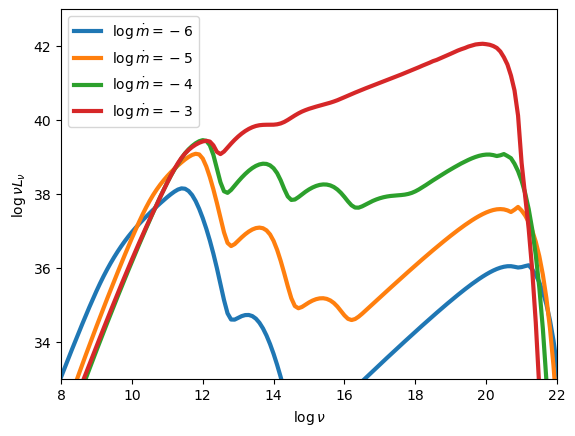

In [4]:
# SED in the ADAF region
logm = 8; logmdotList = [-6, -5, -4, -3]
for logmdot in logmdotList:
    sed = agnSED.SED(logm, logmdot)
    plt.plot(agnSED.lognu, agnSED.lognu+sed, label=rf'$\log{{\dot{{m}}}}={logmdot}$', lw=3)
plt.ylim((33, 43))
plt.xlim((8, 22))
plt.legend()
plt.xlabel(r'$\log{\nu}$')
plt.ylabel(r'$\log{\nu L_\nu}$')

Text(0, 0.5, '$\\log{\\nu L_\\nu}$')

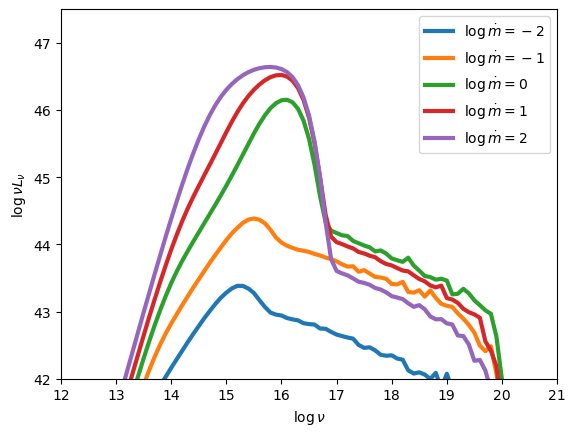

In [5]:
# SED in the disk-corona region
logm = 8; logmdotList = [-2, -1, 0, 1, 2]
for logmdot in logmdotList:
    sed = agnSED.SED(logm, logmdot)
    plt.plot(agnSED.lognu, agnSED.lognu+sed, label=rf'$\log{{\dot{{m}}}}={logmdot}$', lw=3)
plt.ylim((42, 47.5))
plt.xlim((12, 21))
plt.legend()
plt.xlabel(r'$\log{\nu}$')
plt.ylabel(r'$\log{\nu L_\nu}$')

Bolometric luminosity logL_bol= 44.93
hard X-ray [2-10 keV] luminosity logL_HX= 43.63
soft X-ray [0.5-2 keV] luminosity logL_SX= 43.77
4400A luminosity [erg/s] lognu_B*L_B= 43.88


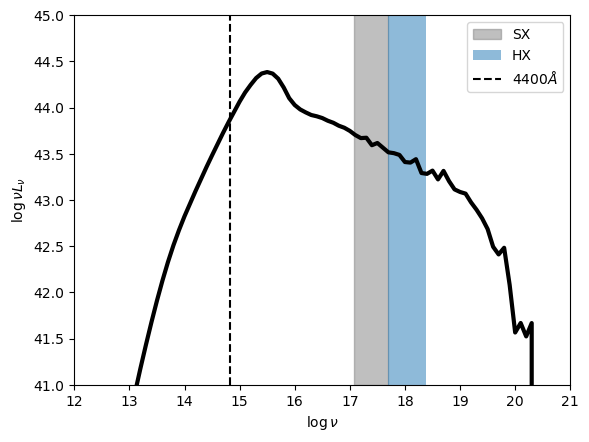

In [6]:
# calculate the phtometric luminosities
import astropy.units as u
import astropy.constants as const

sed = agnSED.SED(logm=8, logmdot=-1)

logLbol = agnSED.Bolometric(np.array([[8, -1]]), component=False)[0]  # calculate bolometric luminosy

ev2f = (u.eV/const.h).cgs.value
lognu_HX0 = np.log10(2e3 * ev2f)
lognu_HX1 = np.log10(1e4 * ev2f)
lognu_SX0 = np.log10(500 * ev2f)
lognu_SX1 = np.log10(2e3 * ev2f)
logLHX = agnSED.Photometric(np.array([[8, -1]]), lognu0=lognu_HX0, lognu1=lognu_HX1, component=False)[0]  # calculate hard X-ray [2-10 keV] luminosity
logLSX = agnSED.Photometric(np.array([[8, -1]]), lognu0=lognu_SX0, lognu1=lognu_SX1, component=False)[0]  # calculate soft X-ray [0.8-2 keV] luminosity
logLB = agnSED.LuminosityPerHerz(np.array([[8, -1]]), lognu0=np.log10(3e8/4400e-10), component=False)[0]  # calculate 4400A luminosity (in erg/s/HZ)

plt.plot(agnSED.lognu, agnSED.lognu+sed, lw=3, c='k')
plt.axvspan(xmin=lognu_SX0, xmax=lognu_SX1, ymin=0, ymax=100, label='SX', alpha=0.5, color='grey')
plt.axvspan(xmin=lognu_HX0, xmax=lognu_HX1, ymin=0, ymax=100, label='HX', alpha=0.5)
plt.axvline(x=np.log10(3e8/4400e-10), ymin=0, ymax=100, c='k', ls='--', label=r'4400$\AA$')
plt.ylim((41, 45))
plt.xlim((12, 21))
plt.legend()
plt.xlabel(r'$\log{\nu}$')
plt.ylabel(r'$\log{\nu L_\nu}$')

print('Bolometric luminosity logL_bol=', round(logLbol,2))
print('hard X-ray [2-10 keV] luminosity logL_HX=', round(logLHX,2))
print('soft X-ray [0.5-2 keV] luminosity logL_SX=', round(logLSX,2))
print('4400A luminosity [erg/s] lognu_B*L_B=', round(logLB+np.log10(3e8/4400e-10), 2))

/tmp/ipykernel_107595/900779783.py:30: RuntimeWarning: divide by zero encountered in log10
  l, = axs[0].plot(c1, np.log10(h1 / (boxsize/h)**3 / (e1[1:]-e1[0:-1])), lw=3)
/tmp/ipykernel_107595/900779783.py:31: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(c2, np.log10(h2 / (boxsize/h)**3 / (e2[1:]-e2[0:-1])), lw=3, label='ADAF', c=l.get_color(), ls='--')
/tmp/ipykernel_107595/900779783.py:32: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(c3, np.log10(h3 / (boxsize/h)**3 / (e3[1:]-e3[0:-1])), lw=3, label='diskcorona', c=l.get_color(), ls=':')
/tmp/ipykernel_107595/900779783.py:33: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(c4, np.log10(h4 / (boxsize/h)**3 / (e4[1:]-e4[0:-1])), lw=3)
/tmp/ipykernel_107595/900779783.py:34: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(c5, np.log10(h5 / (boxsize/h)**3 / (e5[1:]-e5[0:-1])), lw=3)


Text(0, 0.5, '$\\log(\\phi) \\mathrm{[Mpc^{-3}dex^{-1}]}$')

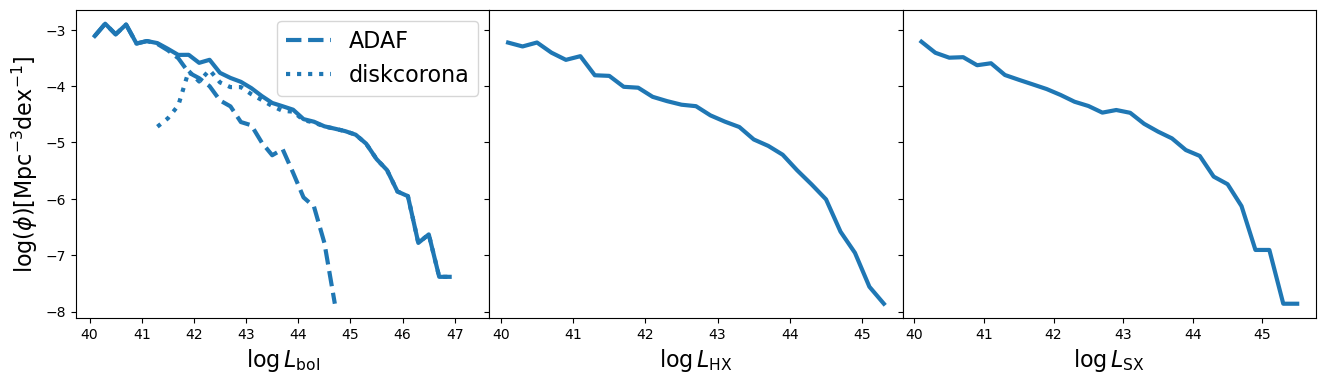

In [7]:
# calculate bolometric, HX, SX luminosity functions
# this file contains binned-up BH mass-BHAR pairs at redshift zero, taken from the H15 Lgalaxies catalogue used in Su et al.2024
# each row contains [logm, logmdot, hist]
# logm is the logarithm of BH mass in solar mass, logmdot is the logarithm of eddington-normalized BHAR, and hist is the histogram number
sample = np.loadtxt(r'z0.0')  

mcut = 6; mdotcut=-8
ind = (sample[:,0]>mcut) & (sample[:,1]>mdotcut)
ind1 = (sample[:,0]>mcut) & (sample[:,1]>mdotcut) & (sample[:,1]<=agnSED.logmdot_crit)
ind2 = (sample[:,0]>mcut) & (sample[:,1]>mdotcut) & (sample[:,1]> agnSED.logmdot_crit)
tmp_adaf, tmp_diskcor = agnSED.Bolometric(sample, mcut=mcut, mdotcut=mdotcut)
logL_bol_adaf = np.repeat(tmp_adaf, sample[ind1,2].astype(int))
logL_bol_diskcor = np.repeat(tmp_diskcor, sample[ind2,2].astype(int))
logL_HX  = np.repeat(agnSED.Photometric(sample, lognu0=lognu_HX0, lognu1=lognu_HX1, mcut=mcut, mdotcut=mdotcut, component=False), sample[ind,2].astype(int))
logL_SX  = np.repeat(agnSED.Photometric(sample, lognu0=lognu_SX0, lognu1=lognu_SX1, mcut=mcut, mdotcut=mdotcut, component=False), sample[ind,2].astype(int))

h1, e1 = np.histogram( np.concatenate((logL_bol_adaf, logL_bol_diskcor)) , bins=40, range = (40,48) )
c1 = (e1[0:-1]+e1[1:])/2
h2, e2 = np.histogram( logL_bol_adaf , bins=40, range = (40,48) )
c2 = (e2[0:-1]+e2[1:])/2
h3, e3 = np.histogram( logL_bol_diskcor , bins=40, range = (40,48) )
c3 = (e3[0:-1]+e3[1:])/2
h4, e4 = np.histogram( logL_HX , bins=40, range = (40,48) )
c4 = (e4[0:-1]+e4[1:])/2
h5, e5 = np.histogram( logL_SX , bins=40, range = (40,48) )
c5 = (e5[0:-1]+e5[1:])/2

boxsize = 480.27; h=0.673
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True, gridspec_kw={'wspace': 0})
l, = axs[0].plot(c1, np.log10(h1 / (boxsize/h)**3 / (e1[1:]-e1[0:-1])), lw=3)
axs[0].plot(c2, np.log10(h2 / (boxsize/h)**3 / (e2[1:]-e2[0:-1])), lw=3, label='ADAF', c=l.get_color(), ls='--')
axs[0].plot(c3, np.log10(h3 / (boxsize/h)**3 / (e3[1:]-e3[0:-1])), lw=3, label='diskcorona', c=l.get_color(), ls=':')
axs[1].plot(c4, np.log10(h4 / (boxsize/h)**3 / (e4[1:]-e4[0:-1])), lw=3)
axs[2].plot(c5, np.log10(h5 / (boxsize/h)**3 / (e5[1:]-e5[0:-1])), lw=3)

axs[0].legend(fontsize=16)
axs[0].set_xlabel(r'$\log{L_\mathrm{bol}}$', fontsize=16)
axs[1].set_xlabel(r'$\log{L_\mathrm{HX}}$', fontsize=16)
axs[2].set_xlabel(r'$\log{L_\mathrm{SX}}$', fontsize=16)
axs[0].set_ylabel(r'$\log(\phi) \mathrm{[Mpc^{-3}dex^{-1}]}$', fontsize=16)